In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test = pd.read_csv('Test.csv')
train = pd.read_csv('Train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


### Number of phones per country

In [4]:
k_phones = train[(train['country'] == 'Kenya') & (train['cellphone_access'] == 'Yes')]
ken = len(k_phones)
ken

4785

In [5]:
r_phones = train[(train['country'] == 'Rwanda') & (train['cellphone_access'] == 'Yes')]
rwa = len(r_phones)
rwa

7249

In [6]:
t_phones = train[(train['country'] == 'Tanzania') & (train['cellphone_access'] == 'Yes')]
tzn = len(t_phones)
tzn

3956

In [7]:
u_phones = train[(train['country'] == 'Uganda') & (train['cellphone_access'] == 'Yes')]
uga = len(u_phones)
uga

1464

([<matplotlib.patches.Wedge at 0x1c0db701430>,
 [Text(0.7166260629062392, 0.8345340532078382, 'Kenya'),
  Text(-1.092822923862854, 0.12545141322377734, 'Rwanda'),
  Text(0.3582435052475668, -1.040029610611129, 'Tanzania'),
  Text(1.0620300352209258, -0.28651737170482233, 'Uganda')],
 [Text(0.39088694340340313, 0.4552003926588208, '27.41'),
  Text(-0.5960852311979203, 0.06842804357660581, '41.53'),
  Text(0.1954055483168546, -0.5672888785151613, '22.67'),
  Text(0.5792891101205049, -0.1562822027480849, '8.39')])

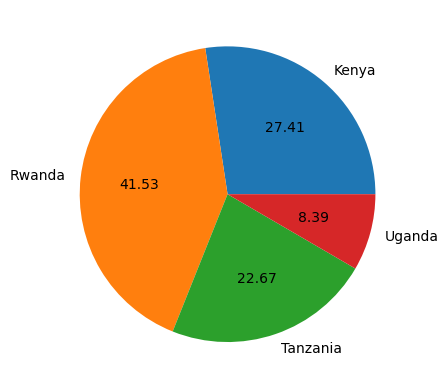

In [8]:

plt.pie([ken, rwa, tzn, uga], labels=['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], autopct='%.2f')


### People with phones that have a bank account per country

In [9]:
ke = len(k_phones[k_phones['bank_account'] == 'Yes'])
ke

1459

In [10]:
rw = len(r_phones[r_phones['bank_account'] == 'Yes'])
rw

984

In [11]:
tz = len(t_phones[t_phones['bank_account'] == 'Yes'])
tz

594

In [12]:
ug = len(u_phones[u_phones['bank_account'] == 'Yes'])
ug

171

Text(0.5, 1.0, 'People with phones who have bank accounts per country')

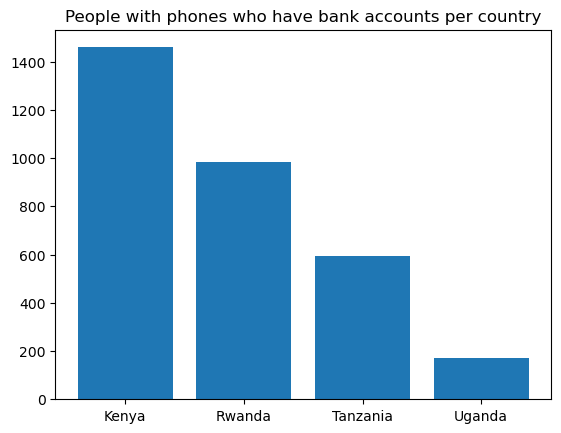

In [13]:
plt.bar(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'],[ke,rw,tz,ug])
plt.title('People with phones who have bank accounts per country')

### People living in rural areas with phones per country

In [14]:
r = len(r_phones[r_phones['location_type'] == 'Rural'])
r

6073

In [15]:
k = len(k_phones[k_phones['location_type'] == 'Rural'])
k

2594

In [16]:
t = len(t_phones[t_phones['location_type'] == 'Rural'])
t

1437

In [17]:
u = len(u_phones[u_phones['location_type'] == 'Rural'])
u

966

<BarContainer object of 4 artists>

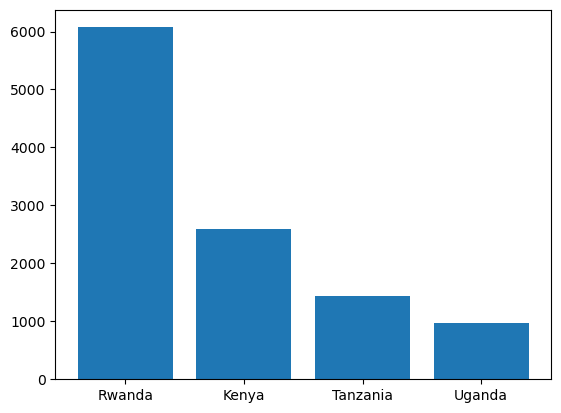

In [18]:
plt.bar(['Rwanda', 'Kenya', 'Tanzania', 'Uganda'], [r,k,t,u])

### Relationship between job type and bank account ownership

In [19]:
train['job_type'].value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

In [20]:
len(train[(train['job_type'] == 'Self employed') & (train['bank_account'] == 'Yes')])


848

In [21]:
len(train[(train['job_type'] == 'Informally employed') & (train['bank_account'] == 'Yes')])

445

In [22]:
len(train[(train['job_type'] == 'Farming and Fishing') & (train['bank_account'] == 'Yes')])

635

In [23]:
len(train[(train['job_type'] == 'Remittance Dependent') & (train['bank_account'] == 'Yes')])

240

In [24]:
len(train[(train['job_type'] == 'Other Income') & (train['bank_account'] == 'Yes')])

196

In [25]:
len(train[(train['job_type'] == 'Formally employed Private') & (train['bank_account'] == 'Yes')])

571

In [26]:
len(train[(train['job_type'] == 'Government Dependent') & (train['bank_account'] == 'Yes')])

50

In [27]:
len(train[(train['job_type'] == 'Dont Know/Refuse to answer') & (train['bank_account'] == 'Yes')])

14

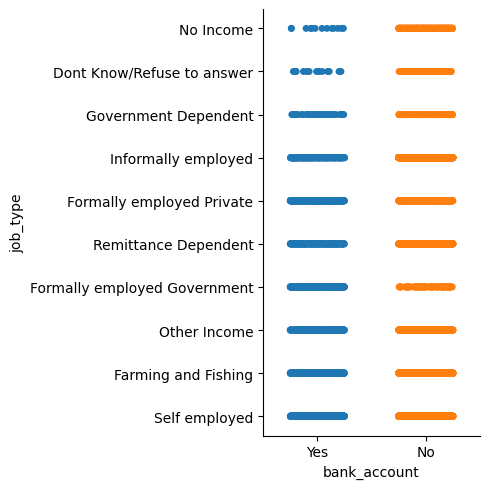

In [28]:
sns.catplot(x='bank_account', y='job_type', data=train, jitter='0.25')

### Relationship between gender and bank account ownership

In [29]:
train['gender_of_respondent'].value_counts()

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64

In [30]:
fem = len(train[(train['gender_of_respondent'] == 'Female') & (train['bank_account'] == 'Yes')])
fem

1482

In [31]:
mal = len(train[(train['gender_of_respondent'] == 'Male') & (train['bank_account'] == 'Yes')])
mal

1830

In [32]:
gen_numbers = [fem, mal]
gen_numbers

[1482, 1830]

In [33]:
gen = ['Female','Male']
gen

['Female', 'Male']

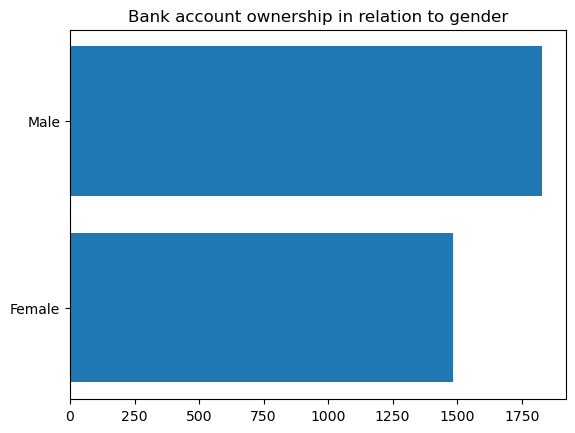

In [34]:
plt.barh(gen, gen_numbers)
plt.title('Bank account ownership in relation to gender')
plt.show()

### Relationship between relationship with head of the family and bank account ownership

In [35]:
train['relationship_with_head'].value_counts()

Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: relationship_with_head, dtype: int64

In [36]:
train[(train['relationship_with_head'] == 'Head of Household') & (train['bank_account'] == 'Yes')].count()[0]

2273

In [37]:
train[(train['relationship_with_head'] == 'Spouse') & (train['bank_account'] == 'Yes')].count()[0]

695

In [38]:
train[(train['relationship_with_head'] == 'Child') & (train['bank_account'] == 'Yes')].count()[0]

193

In [39]:
train[(train['relationship_with_head'] == 'Parent') & (train['bank_account'] == 'Yes')].count()[0]

65

In [40]:
train[(train['relationship_with_head'] == 'Other relative') & (train['bank_account'] == 'Yes')].count()[0]

66

In [41]:
train[(train['relationship_with_head'] == 'Other non-relatives') & (train['bank_account'] == 'Yes')].count()[0]

20

### Relationship between education level and bank account ownership

In [42]:
train['education_level'].value_counts()

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64

In [43]:
pri = train[(train['education_level'] == 'Primary education') & (train['bank_account'] == 'Yes')].count()[0]
pri

1093

In [44]:
nfm = train[(train['education_level'] == 'No formal education') & (train['bank_account'] == 'Yes')].count()[0]
nfm

176

In [45]:
sec = train[(train['education_level'] == 'Secondary education') & (train['bank_account'] == 'Yes')].count()[0]
sec

983

In [46]:
tet = train[(train['education_level'] == 'Tertiary education') & (train['bank_account'] == 'Yes')].count()[0]
tet

591

In [47]:
voc = train[(train['education_level'] == 'Vocational/Specialised training') & (train['bank_account'] == 'Yes')].count()[0]
voc

458

In [48]:
oth = train[(train['education_level'] == 'Other/Dont know/RTA') & (train['bank_account'] == 'Yes')].count()[0]
oth

11

([<matplotlib.patches.Wedge at 0x1c0dd2e7d00>,
 [Text(0.6108104899060817, 1.0329136195349022, 'Primary Education'),
  Text(-0.6828045757614096, 0.8624255975556858, 'No Formal Education'),
  Text(-1.0784547482087425, -0.2166456924704896, 'Secondary Education'),
  Text(0.13219195919332, -1.092028060960263, 'Tertiary Education'),
  Text(1.077753254312614, -0.5276816491205376, 'Vocational/Specialised Training'),
  Text(1.399923792651683, -0.014607353207483664, 'Other/Dont Know/RTA')])

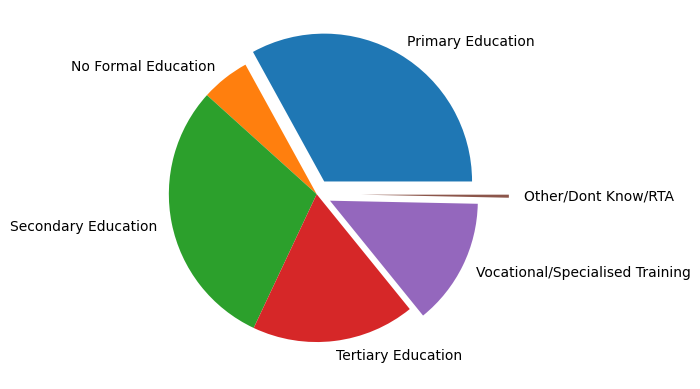

In [49]:
explode = (.1,0,0,0,.1,.3)
lab = ['Primary Education', 'No Formal Education', 'Secondary Education', 'Tertiary Education', 'Vocational/Specialised Training', 'Other/Dont Know/RTA']
plt.pie([pri, nfm, sec, tet, voc, oth], labels=lab, pctdistance = 0.8, explode = explode)

### Number of people in the rural area who own a phone and bank account

In [50]:
w =train[(train['location_type']=='Rural') & (train['cellphone_access']=='Yes') & (train['bank_account']=='Yes')].count()[0]
w

1600

### Number of people in the rural area who have no phone and no bank account

In [51]:
x = train[(train['location_type']=='Rural') & (train['cellphone_access']=='No') & (train['bank_account']=='No')].count()[0]
x

3202

### Number of people in the rural area who have a phone but have no bank account

In [52]:
y = train[(train['location_type']=='Rural') & (train['cellphone_access']=='Yes') & (train['bank_account']=='No')].count()[0]
y

9470

### Number of people on the rural area who have no phone but have a bank account

In [53]:
z = train[(train['location_type']=='Rural') & (train['cellphone_access']=='No') & (train['bank_account']=='Yes')].count()[0]
z

71

<BarContainer object of 4 artists>

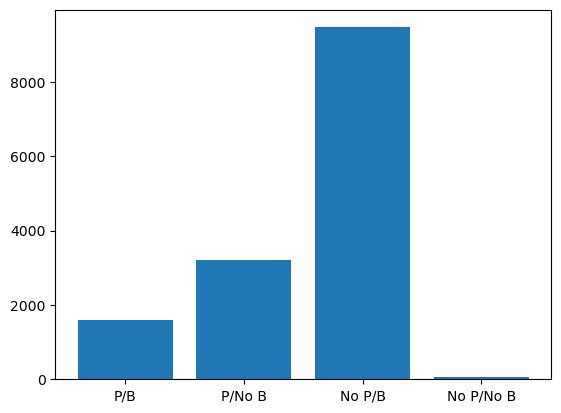

In [54]:
status = ['P/B', 'P/No B', 'No P/B', 'No P/No B']
plt.bar(status, [w,x,y,z])

### Average age of data collection

In [55]:
train['age_of_respondent'].mean()


38.80522020064615

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

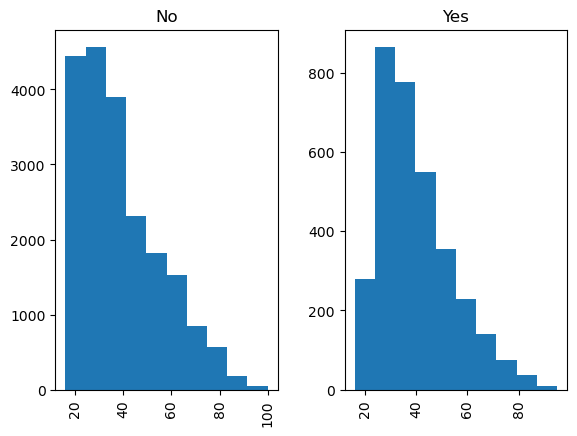

In [56]:
train.hist(column='age_of_respondent', by='bank_account')

### Correlation heatmap


In [57]:
train.corr()

,year,household_size,age_of_respondent
year,1.000000,-0.052264,-0.019330
household_size,-0.052264,1.000000,-0.129729
age_of_respondent,-0.019330,-0.129729,1.000000


<AxesSubplot:>

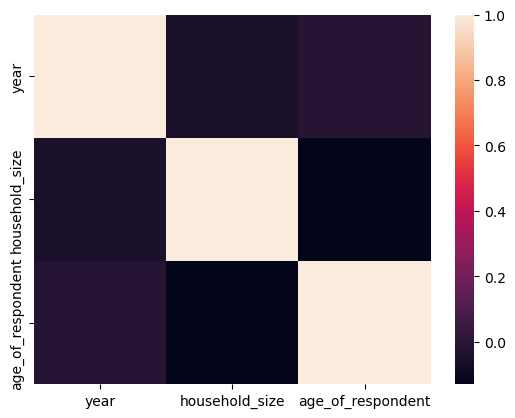

In [58]:
sns.heatmap(train.corr())